# ROC curves
## Comparison of different trainings with different setups for inference

In [1]:
# Hendrik Schönen
# This script plots ROC curves
# It requires the datapoints created by scripts/plot_roc.py

import numpy as np
import pandas
import matplotlib.pyplot as plt
import mplhep as hep

plt.style.use(hep.cms.style.ROOT)
plt.rcParams['axes.axisbelow'] = True

In [2]:
model_names = ['nominal','nominal_2','nominal_3','nominal_seed1','nominal_seed2']#['nominal','fgsm-0_025','fgsm-0_05','fgsm-0_075','fgsm-0_1','fgsm-0_125','fgsm-0_15','fgsm-0_175','fgsm-0_225',]#
prediction_names = ['nominal']#,'fgsm-0_1']#,'gaussian-0_1','gaussian-1','gaussian-5']#'gaussian-0_05','gaussian-0_1','gaussian-0_2','gaussian-1','gaussian-5']#'fgsm-0_025','fgsm-0_05','fgsm-0_075',,'fgsm-0_125','fgsm-0_15']#,'fgsm-0_05','fgsm-0_075','fgsm-0_1','fgsm-0_125','fgsm-0_15']
model_dir = '/net/data_cms/institut_3a/hschoenen/models/' #'/net/scratch_cms3a/hschoenen/deepjet/results/'
saveDir = '/home/home1/institut_3a/hschoenen/plots'


In [3]:
model_labels = {
    'nominal': 'nominal (seed=0)',
    'nominal_2': 'nominal (seed=0)',
    'nominal_3': 'nominal (seed=0)',
    'nominal_seed1': 'nominal (seed=1)',
    'nominal_seed2': 'nominal (seed=2)',
    'fgsm-0_01': r'fgsm training $\epsilon=0.01$',
    'fgsm-0_025': r'fgsm training $\epsilon=0.025$',
    'fgsm-0_05': r'fgsm training $\epsilon=0.05$',
    'fgsm-0_075': r'fgsm training $\epsilon=0.075$',
    'fgsm-0_1': r'fgsm training $\epsilon=0.1$',
    'fgsm-0_125': r'fgsm training $\epsilon=0.125$',
    'fgsm-0_15': r'fgsm training $\epsilon=0.15$',
    'fgsm-0_175': r'fgsm training $\epsilon=0.175$',
    'fgsm-0_2': r'fgsm training $\epsilon=0.2$',
    'fgsm-0_225': r'fgsm training $\epsilon=0.225$',
    'fgsm-0_25': r'fgsm training $\epsilon=0.25$',
}

prediction_labels = {
    'nominal': 'nominal inputs',
    'fgsm-0_01': r'fgsm inputs $\epsilon=0.01$',
    'fgsm-0_025': r'fgsm inputs $\epsilon=0.025$',
    'fgsm-0_05': r'fgsm inputs $\epsilon=0.05$',
    'fgsm-0_075': r'fgsm inputs $\epsilon=0.075$',
    'fgsm-0_1': r'fgsm inputs $\epsilon=0.1$',
    'fgsm-0_125': r'fgsm inputs $\epsilon=0.125$',
    'fgsm-0_15': r'fgsm inputs $\epsilon=0.15$',
    'fgsm-0_175': r'fgsm inputs $\epsilon=0.175$',
    'fgsm-0_2': r'fgsm inputs $\epsilon=0.2$',
    'fgsm-0_225': r'fgsm inputs $\epsilon=0.225$',
    'fgsm-0_25': r'fgsm inputs $\epsilon=0.25$',
    'gaussian-0_05': r'gaussian inputs $\epsilon=0.05$',
    'gaussian-0_1': r'gaussian inputs $\epsilon=0.1$',
    'gaussian-0_2': r'gaussian inputs $\epsilon=0.2$',
    'gaussian-1': r'gaussian inputs $\epsilon=1.0$',
    'gaussian-5': r'gaussian inputs $\epsilon=5.0$',
}

# decide, whether models are plotted in different colors or linestyles
model_linestyles = False

linestyles = ['solid','dashed','dotted','dashdot']
colors = ['tab:blue','tab:orange','tab:green', 'tab:purple','tab:red',  'tab:olive', 'tab:cyan', 'tab:pink', 'tab:brown', 'tab:grey']

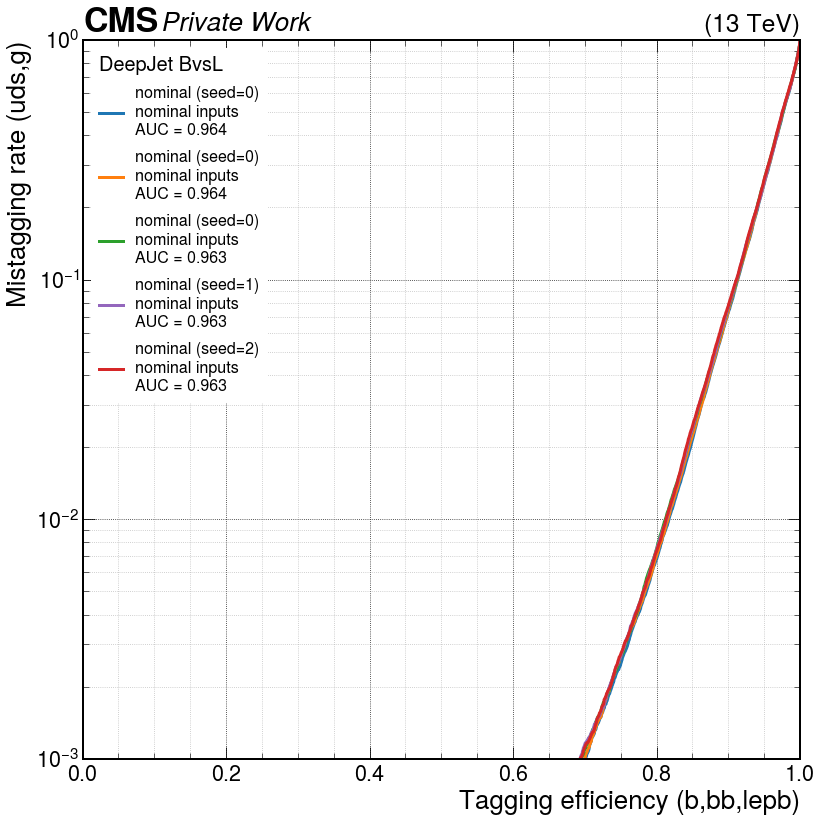

In [5]:
# BvsL ROC curve
plt.rcParams["figure.autolayout"] = True

fig,ax = plt.subplots(figsize=[12,12])
plt.style.use(hep.cms.style.ROOT)
ax.set_xlim(left=0.,right=1)
ax.set_yscale('log')
ax.set_ylim(bottom=1e-3)
ax.set_ylim(top=1)

tag_name = ' (b,bb,lepb)'
mistag_name = ' (uds,g)'

ax.set_ylabel('Mistagging rate'+mistag_name)
ax.set_xlabel('Tagging efficiency'+tag_name)
ax.grid(which='minor', alpha=0.85)
ax.grid(which='major', alpha=0.95, color='black')

legtitle = 'BvsL'
legloc = 'upper left'
title=''
for i,model in enumerate(model_names):
    title = title + model + '_'
    for j,prediction in enumerate(prediction_names):
        xya = np.load(model_dir+model+'/predict_'+prediction+'/BvL.npy', allow_pickle=True)
        legend_text = model_labels[model] + '\n' + prediction_labels[prediction] + '\n' + 'AUC = ' + f'{xya[2,0]:.3f}'
        if model_linestyles:
            ax.plot(xya[0], xya[1], linestyle=linestyles[i], color=colors[j], linewidth=3.0, label=legend_text)
        else:
            ax.plot(xya[0], xya[1], linestyle=linestyles[j], color=colors[i], linewidth=3.0, label=legend_text)
# make ROC=0.5 line
#ax.plot(np.arange(1e-3,1,1e-3),np.arange(1e-3,1,1e-3), color='black')
# make legend
if len(model_names)*len(prediction_names)<8:
    leg = ax.legend(title='DeepJet '+legtitle,loc=legloc,fontsize=16,title_fontsize=20,labelspacing=0.7,frameon=True,framealpha=1,facecolor='white')
else:
    if not model_linestyles:
        handles, labels = ax.get_legend_handles_labels()
        handles_sort = handles[0::2]+handles[1::2]
        labels_sort = labels[0::2]+labels[1::2]
    else:
        handles, labels = ax.get_legend_handles_labels()
        handles_sort = handles
        labels_sort = labels
    leg = ax.legend(handles_sort, labels_sort, title='DeepJet '+legtitle, fontsize=12, ncols=2, loc=legloc, handleheight=7, labelspacing=0.05, frameon=True,framealpha=1,facecolor='white')
if 'right' in legloc:
    aligned = 'right'
else:
    aligned = 'left'
leg._legend_box.align = aligned
if len(model_names)*len(prediction_names)>8:
    leg._legend_box.align = 'center'
leg.get_frame().set_linewidth(0.0)
hep.cms.label(llabel='Private Work',rlabel='(13 TeV)')
fig.savefig('{}/roc_curves/ROC_BvsL.pdf'.format(saveDir), bbox_inches='tight')
fig.savefig('ROC_BvsL.pdf', bbox_inches='tight')

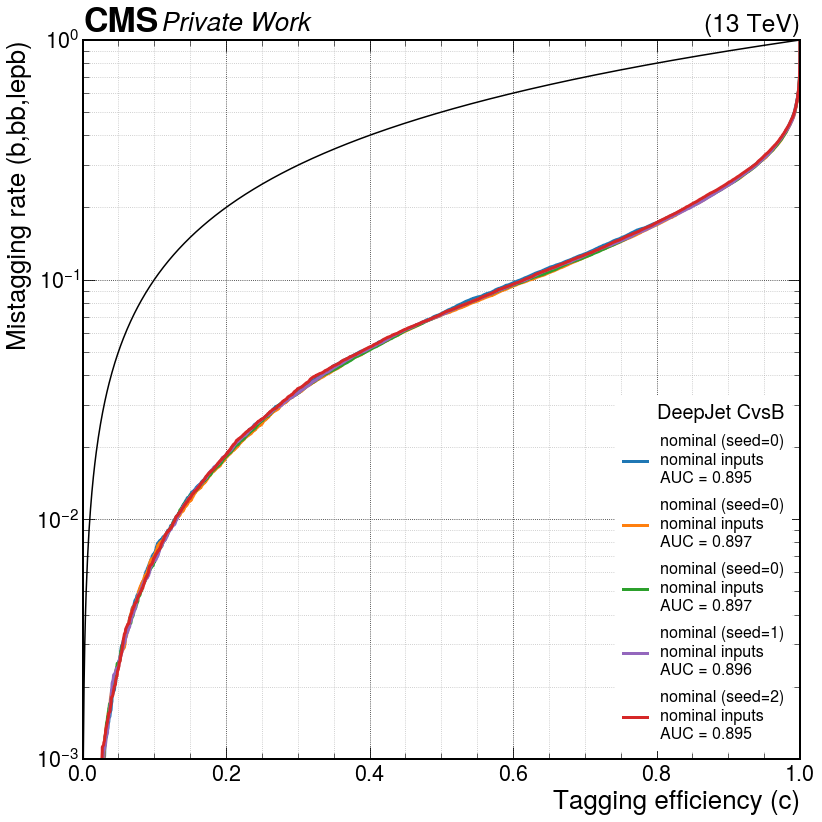

In [6]:
# CvsB ROC curve
fig,ax = plt.subplots(figsize=[12,12])
plt.style.use(hep.cms.style.ROOT)
ax.set_xlim(left=0.,right=1)
ax.set_yscale('log')
ax.set_ylim(bottom=1e-3)
ax.set_ylim(top=1)

tag_name = ' (c)'
mistag_name = ' (b,bb,lepb)'

ax.set_ylabel('Mistagging rate'+mistag_name)
ax.set_xlabel('Tagging efficiency'+tag_name)
ax.grid(which='minor', alpha=0.85)
ax.grid(which='major', alpha=0.95, color='black')

legtitle = 'CvsB'
legloc = 'lower right'
title=''
for i,model in enumerate(model_names):
    title = title + model + '_'
    for j,prediction in enumerate(prediction_names):
        xya = np.load(model_dir+model+'/predict_'+prediction+'/CvB.npy', allow_pickle=True)
        legend_text = model_labels[model] + '\n' + prediction_labels[prediction] + '\n' + 'AUC = ' + f'{xya[2,0]:.3f}'
        if model_linestyles:
            ax.plot(xya[0], xya[1], linestyle=linestyles[i], color=colors[j], linewidth=3.0, label=legend_text)
        else:
            ax.plot(xya[0], xya[1], linestyle=linestyles[j], color=colors[i], linewidth=3.0, label=legend_text)
# make ROC=0.5 line
ax.plot(np.arange(1e-3,1,1e-3),np.arange(1e-3,1,1e-3), color='black')
# make legend
if len(model_names)*len(prediction_names)<8:
    leg = ax.legend(title='DeepJet '+legtitle,loc=legloc,fontsize=16,title_fontsize=20,labelspacing=0.7,frameon=True,framealpha=1,facecolor='white')
else:
    if not model_linestyles:
        handles, labels = ax.get_legend_handles_labels()
        handles_sort = handles[0::2]+handles[1::2]
        labels_sort = labels[0::2]+labels[1::2]
    else:
        handles, labels = ax.get_legend_handles_labels()
        handles_sort = handles
        labels_sort = labels
    leg = ax.legend(handles_sort, labels_sort, title='DeepJet '+legtitle, fontsize=12, ncols=2, loc=legloc, handleheight=7, labelspacing=0.05, frameon=True,framealpha=1,facecolor='white')
if 'right' in legloc:
    aligned = 'right'
else:
    aligned = 'left'
leg._legend_box.align = aligned
if len(model_names)*len(prediction_names)>8:
    leg._legend_box.align = 'center'
leg.get_frame().set_linewidth(0.0)
hep.cms.label(llabel='Private Work',rlabel='(13 TeV)')
fig.savefig('{}/roc_curves/ROC_CvsB.pdf'.format(saveDir), bbox_inches='tight')
fig.savefig('ROC_CvsB.pdf', bbox_inches='tight')

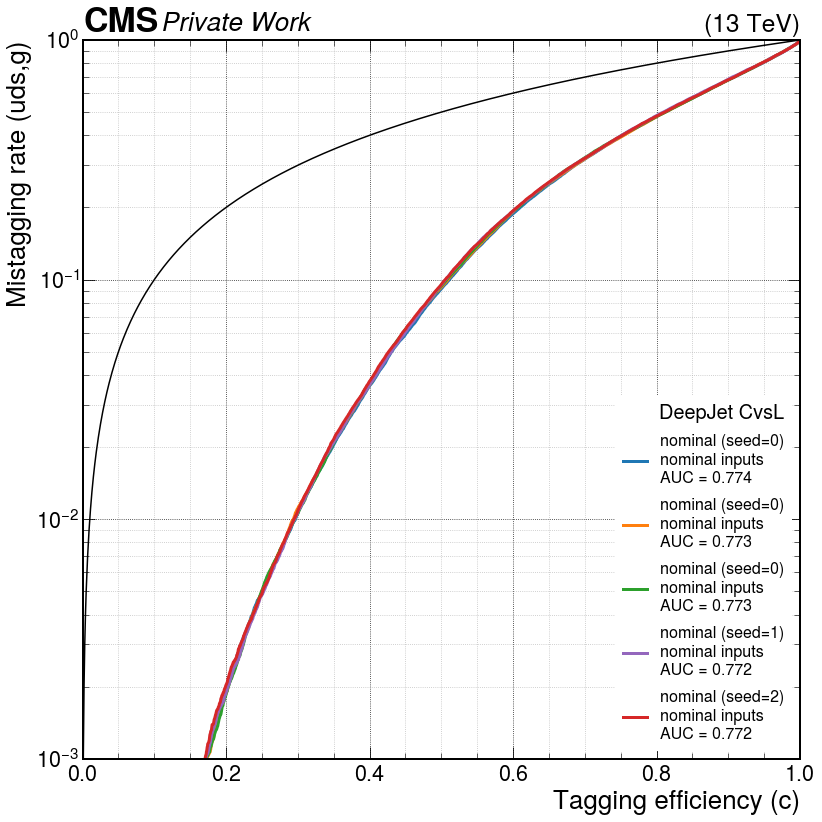

In [7]:
# CvsL ROC curve
fig,ax = plt.subplots(figsize=[12,12])
plt.style.use(hep.cms.style.ROOT)
ax.set_xlim(left=0.,right=1)
ax.set_yscale('log')
ax.set_ylim(bottom=1e-3)
ax.set_ylim(top=1)

tag_name = ' (c)'
mistag_name = ' (uds,g)'

ax.set_ylabel('Mistagging rate'+mistag_name)
ax.set_xlabel('Tagging efficiency'+tag_name)
ax.grid(which='minor', alpha=0.85)
ax.grid(which='major', alpha=0.95, color='black')

legtitle = 'CvsL'
legloc = 'lower right'
title=''
for i,model in enumerate(model_names):
    title = title + model + '_'
    for j,prediction in enumerate(prediction_names):
        xya = np.load(model_dir+model+'/predict_'+prediction+'/CvL.npy', allow_pickle=True)
        legend_text = model_labels[model] + '\n' + prediction_labels[prediction] + '\n' + 'AUC = ' + f'{xya[2,0]:.3f}'
        if model_linestyles:
            ax.plot(xya[0], xya[1], linestyle=linestyles[i], color=colors[j], linewidth=3.0, label=legend_text)
        else:
            ax.plot(xya[0], xya[1], linestyle=linestyles[j], color=colors[i], linewidth=3.0, label=legend_text)
# make ROC=0.5 line
ax.plot(np.arange(1e-3,1,1e-3),np.arange(1e-3,1,1e-3), color='black')
# make legend
if len(model_names)*len(prediction_names)<8:
    leg = ax.legend(title='DeepJet '+legtitle,loc=legloc,fontsize=16,title_fontsize=20,labelspacing=0.7,frameon=True,framealpha=1,facecolor='white')
else:
    if not model_linestyles:
        handles, labels = ax.get_legend_handles_labels()
        handles_sort = handles[0::2]+handles[1::2]
        labels_sort = labels[0::2]+labels[1::2]
    else:
        handles, labels = ax.get_legend_handles_labels()
        handles_sort = handles
        labels_sort = labels
    leg = ax.legend(handles_sort, labels_sort, title='DeepJet '+legtitle, fontsize=12, ncols=2, loc=legloc, handleheight=7, labelspacing=0.05, frameon=True,framealpha=1,facecolor='white')
if 'right' in legloc:
    aligned = 'right'
else:
    aligned = 'left'
leg._legend_box.align = aligned
if len(model_names)*len(prediction_names)>8:
    leg._legend_box.align = 'center'
leg.get_frame().set_linewidth(0.0)
hep.cms.label(llabel='Private Work',rlabel='(13 TeV)')
fig.savefig('{}/roc_curves/ROC_CvsL.pdf'.format(saveDir), bbox_inches='tight')
fig.savefig('ROC_CvsL.pdf', bbox_inches='tight')

In [8]:
# create a Latex table for the AUC values
model_names = ['nominal','fgsm-0_025','fgsm-0_05','fgsm-0_075','fgsm-0_1','fgsm-0_125','fgsm-0_15','fgsm-0_175','fgsm-0_2','fgsm-0_225','fgsm-0_25']#
prediction_names = ['nominal','fgsm-0_025','fgsm-0_05','fgsm-0_075','fgsm-0_1','fgsm-0_125','fgsm-0_15','fgsm-0_175','fgsm-0_2','fgsm-0_225','fgsm-0_25']

BvsL_AUC = np.zeros((len(model_names),len(prediction_names)))
CvsB_AUC = np.zeros((len(model_names),len(prediction_names)))
CvsL_AUC = np.zeros((len(model_names),len(prediction_names)))

for i,model in enumerate(model_names):
    for j,prediction in enumerate(prediction_names):
        xya = np.load(model_dir+model+'/predict_'+prediction+'/BvL.npy', allow_pickle=True)
        BvsL_AUC[i,j] = xya[2,0]
        xya = np.load(model_dir+model+'/predict_'+prediction+'/CvB.npy', allow_pickle=True)
        CvsB_AUC[i,j] = xya[2,0]
        xya = np.load(model_dir+model+'/predict_'+prediction+'/CvL.npy', allow_pickle=True)
        CvsL_AUC[i,j] = xya[2,0]

discriminators = [BvsL_AUC,CvsB_AUC,CvsL_AUC]
discriminator_names = ['BvsL','CvsB','CvsL']
for n,AUC_array in enumerate(discriminators):
    print('\\begin{table}[h]')
    print('\\label{' + 'tab:AUC_{}'.format(discriminator_names[n])+'}')
    print('\\caption{'+'{} AUC values'.format(discriminator_names[n])+'}')
    columns = '\\begin{tabular}{|c|'
    line = 'model '
    for prediction in prediction_names:
        columns += 'c|'
        line += '& {} '.format(prediction.replace('_','\\_'))
    line += '\\\\'
    columns += '}'
    new_column = '\\hline '+len(prediction_names)*'&'+' \\\\[-1em]'
    print(columns)
    print(new_column)
    print(line)
    for i,model_name in enumerate(model_names):
        print(new_column)
        line = '{} '.format(model_labels[model_name])
        for j in range(len(AUC_array[0,:])):
            if AUC_array[i,j]==np.max(AUC_array[:,j]):
                line += ('& \\textbf{'+'{:.3f}'.format(AUC_array[i,j])+'} ')
            else:
                line += '& {:.3f} '.format(AUC_array[i,j])
        line += '\\\\'
        print(line)
    print('\\hline')
    print('\\end{tabular}')
    print('\\end{table} \n')
        

\begin{table}[h]
\label{tab:AUC_BvsL}
\caption{BvsL AUC values}
\begin{tabular}{|c|c|c|c|c|c|c|c|c|c|c|c|}
\hline &&&&&&&&&&& \\[-1em]
model & nominal & fgsm-0\_025 & fgsm-0\_05 & fgsm-0\_075 & fgsm-0\_1 & fgsm-0\_125 & fgsm-0\_15 & fgsm-0\_175 & fgsm-0\_2 & fgsm-0\_225 & fgsm-0\_25 \\
\hline &&&&&&&&&&& \\[-1em]
nominal training & \textbf{0.963} & 0.948 & 0.938 & 0.929 & 0.922 & 0.915 & 0.909 & 0.903 & 0.898 & 0.893 & 0.889 \\
\hline &&&&&&&&&&& \\[-1em]
fgsm training $\epsilon=0.025$ & 0.961 & \textbf{0.957} & 0.954 & 0.951 & 0.948 & 0.945 & 0.942 & 0.940 & 0.937 & 0.935 & 0.932 \\
\hline &&&&&&&&&&& \\[-1em]
fgsm training $\epsilon=0.05$ & 0.959 & 0.956 & 0.954 & 0.952 & 0.950 & 0.948 & 0.946 & 0.944 & 0.942 & 0.940 & 0.939 \\
\hline &&&&&&&&&&& \\[-1em]
fgsm training $\epsilon=0.075$ & 0.958 & 0.956 & 0.954 & 0.953 & 0.951 & 0.949 & 0.948 & 0.946 & 0.945 & 0.943 & 0.942 \\
\hline &&&&&&&&&&& \\[-1em]
fgsm training $\epsilon=0.1$ & 0.958 & 0.956 & 0.955 & 0.953 & 0.952 & 0.951 & 0.9

0
0
0
0
0


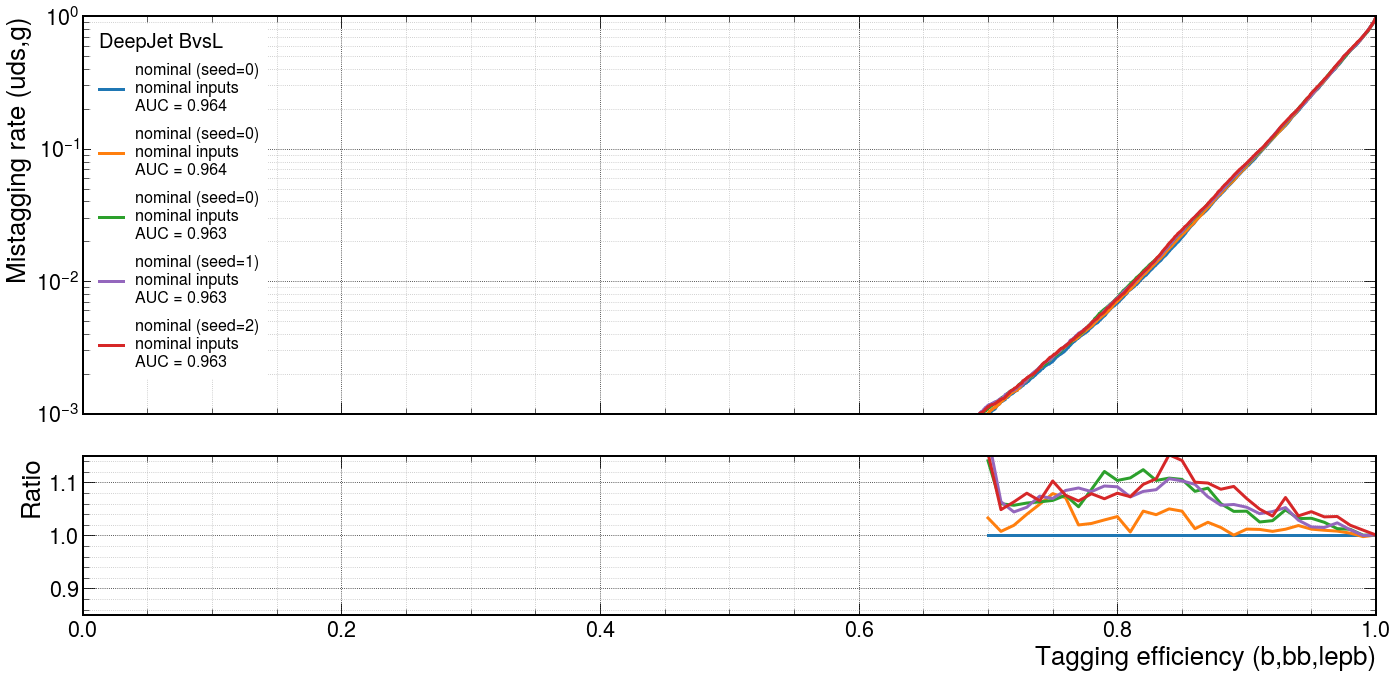

In [8]:
# BvsL ROC curve with subplot
plt.rcParams["figure.autolayout"] = True

fig,ax = plt.subplots(nrows=2, figsize=(20,10), sharex=True, gridspec_kw={'height_ratios': [5, 2]})
plt.style.use(hep.cms.style.ROOT)
ax[0].set_xlim(left=0.,right=1)
ax[0].set_yscale('log')
ax[0].set_ylim(bottom=1e-3,top=1)
ax[1].set_ylim(bottom=0.85,top=1.15)

tag_name = ' (b,bb,lepb)'
mistag_name = ' (uds,g)'

ax[0].set_ylabel('Mistagging rate'+mistag_name)
ax[1].set_ylabel('Ratio')
ax[1].set_xlabel('Tagging efficiency'+tag_name)
ax[0].grid(which='minor', alpha=0.85)
ax[0].grid(which='major', alpha=0.95, color='black')
ax[1].grid(which='minor', alpha=0.85)
ax[1].grid(which='major', alpha=0.95, color='black')

legtitle = 'BvsL'
legloc = 'upper left'
title=''
for i,model in enumerate(model_names):
    title = title + model + '_'
    for j,prediction in enumerate(prediction_names):
        xya = np.load(model_dir+model+'/predict_'+prediction+'/BvL.npy', allow_pickle=True)
        legend_text = model_labels[model] + '\n' + prediction_labels[prediction] + '\n' + 'AUC = ' + f'{xya[2,0]:.3f}'
        if model_linestyles:
            ax[0].plot(xya[0], xya[1], linestyle=linestyles[i], color=colors[j], linewidth=3.0, label=legend_text)
        else:
            ax[0].plot(xya[0], xya[1], linestyle=linestyles[j], color=colors[i], linewidth=3.0, label=legend_text)
        if i==0 and j==0:
            reference_xya = xya
        # find out indices
        ticks = np.arange(0.7,1,0.01)
        indices = []
        reference_indices = []
        for tick in ticks:
            indices.append(np.abs(xya[0]-tick).argmin())
            reference_indices.append(np.abs(reference_xya[0]-tick).argmin())
        #print(indices)
        print(np.sum(np.where(np.abs(xya[0][indices]-ticks)>0.001,1,0)))
        if model_linestyles:
            ax[1].plot(ticks, xya[1][indices]/reference_xya[1][reference_indices], linestyle=linestyles[i], color=colors[j], linewidth=3.0, label=legend_text)
        else:
            ax[1].plot(ticks, xya[1][indices]/reference_xya[1][reference_indices], linestyle=linestyles[j], color=colors[i], linewidth=3.0, label=legend_text)
        
# make ROC=0.5 line
#ax.plot(np.arange(1e-3,1,1e-3),np.arange(1e-3,1,1e-3), color='black')
# make legend
if len(model_names)*len(prediction_names)<8:
    leg = ax[0].legend(title='DeepJet '+legtitle,loc=legloc,fontsize=16,title_fontsize=20,labelspacing=0.7,frameon=True,framealpha=1,facecolor='white')
else:
    if not model_linestyles:
        handles, labels = ax[0].get_legend_handles_labels()
        handles_sort = handles[0::2]+handles[1::2]
        labels_sort = labels[0::2]+labels[1::2]
    else:
        handles, labels = ax[0].get_legend_handles_labels()
        handles_sort = handles
        labels_sort = labels
    leg = ax[0].legend(handles_sort, labels_sort, title='DeepJet '+legtitle, fontsize=12, ncols=2, loc=legloc, handleheight=7, labelspacing=0.05, frameon=True,framealpha=1,facecolor='white')
if 'right' in legloc:
    aligned = 'right'
else:
    aligned = 'left'
leg._legend_box.align = aligned
if len(model_names)*len(prediction_names)>8:
    leg._legend_box.align = 'center'
leg.get_frame().set_linewidth(0.0)
#hep.cms.label(llabel='Private Work',rlabel='(13 TeV)')
plt.tight_layout()
fig.subplots_adjust(hspace=0.0)
fig.savefig('{}/roc_curves/ROC_subplot_BvsL.pdf'.format(saveDir), bbox_inches='tight')
fig.savefig('ROC_BvsL.pdf', bbox_inches='tight')

0
0
0
0
0


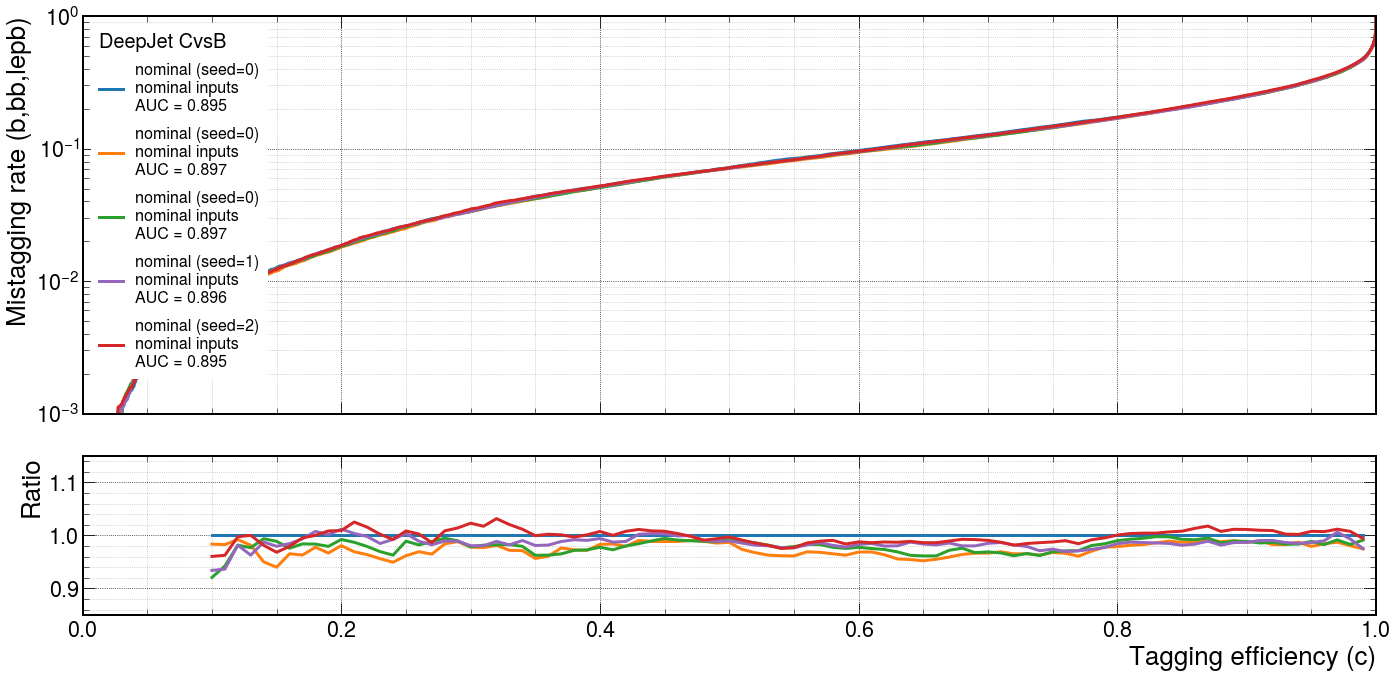

In [9]:
# CvsB ROC curve with subplot
plt.rcParams["figure.autolayout"] = True

fig,ax = plt.subplots(nrows=2, figsize=(20,10), sharex=True, gridspec_kw={'height_ratios': [5, 2]})
plt.style.use(hep.cms.style.ROOT)
ax[0].set_xlim(left=0.,right=1)
ax[0].set_yscale('log')
ax[0].set_ylim(bottom=1e-3,top=1)
ax[1].set_ylim(bottom=0.85,top=1.15)

tag_name = ' (c)'
mistag_name = ' (b,bb,lepb)'

ax[0].set_ylabel('Mistagging rate'+mistag_name)
ax[1].set_ylabel('Ratio')
ax[1].set_xlabel('Tagging efficiency'+tag_name)
ax[0].grid(which='minor', alpha=0.85)
ax[0].grid(which='major', alpha=0.95, color='black')
ax[1].grid(which='minor', alpha=0.85)
ax[1].grid(which='major', alpha=0.95, color='black')

legtitle = 'CvsB'
legloc = 'upper left'
title=''
for i,model in enumerate(model_names):
    title = title + model + '_'
    for j,prediction in enumerate(prediction_names):
        xya = np.load(model_dir+model+'/predict_'+prediction+'/CvB.npy', allow_pickle=True)
        legend_text = model_labels[model] + '\n' + prediction_labels[prediction] + '\n' + 'AUC = ' + f'{xya[2,0]:.3f}'
        if model_linestyles:
            ax[0].plot(xya[0], xya[1], linestyle=linestyles[i], color=colors[j], linewidth=3.0, label=legend_text)
        else:
            ax[0].plot(xya[0], xya[1], linestyle=linestyles[j], color=colors[i], linewidth=3.0, label=legend_text)
        if i==0 and j==0:
            reference_xya = xya
        # find out indices
        ticks = np.arange(0.1,1,0.01)
        indices = []
        reference_indices = []
        for tick in ticks:
            indices.append(np.abs(xya[0]-tick).argmin())
            reference_indices.append(np.abs(reference_xya[0]-tick).argmin())
        #print(indices)
        print(np.sum(np.where(np.abs(xya[0][indices]-ticks)>0.001,1,0)))
        if model_linestyles:
            ax[1].plot(ticks, xya[1][indices]/reference_xya[1][reference_indices], linestyle=linestyles[i], color=colors[j], linewidth=3.0, label=legend_text)
        else:
            ax[1].plot(ticks, xya[1][indices]/reference_xya[1][reference_indices], linestyle=linestyles[j], color=colors[i], linewidth=3.0, label=legend_text)
        
# make ROC=0.5 line
#ax.plot(np.arange(1e-3,1,1e-3),np.arange(1e-3,1,1e-3), color='black')
# make legend
if len(model_names)*len(prediction_names)<8:
    leg = ax[0].legend(title='DeepJet '+legtitle,loc=legloc,fontsize=16,title_fontsize=20,labelspacing=0.7,frameon=True,framealpha=1,facecolor='white')
else:
    if not model_linestyles:
        handles, labels = ax[0].get_legend_handles_labels()
        handles_sort = handles[0::2]+handles[1::2]
        labels_sort = labels[0::2]+labels[1::2]
    else:
        handles, labels = ax[0].get_legend_handles_labels()
        handles_sort = handles
        labels_sort = labels
    leg = ax[0].legend(handles_sort, labels_sort, title='DeepJet '+legtitle, fontsize=12, ncols=2, loc=legloc, handleheight=7, labelspacing=0.05, frameon=True,framealpha=1,facecolor='white')
if 'right' in legloc:
    aligned = 'right'
else:
    aligned = 'left'
leg._legend_box.align = aligned
if len(model_names)*len(prediction_names)>8:
    leg._legend_box.align = 'center'
leg.get_frame().set_linewidth(0.0)
#hep.cms.label(llabel='Private Work',rlabel='(13 TeV)')
plt.tight_layout()
fig.subplots_adjust(hspace=0.0)
fig.savefig('{}/roc_curves/ROC_subplot_CvsB.pdf'.format(saveDir), bbox_inches='tight')
fig.savefig('ROC_CvsB.pdf', bbox_inches='tight')

0
0
0
0
0


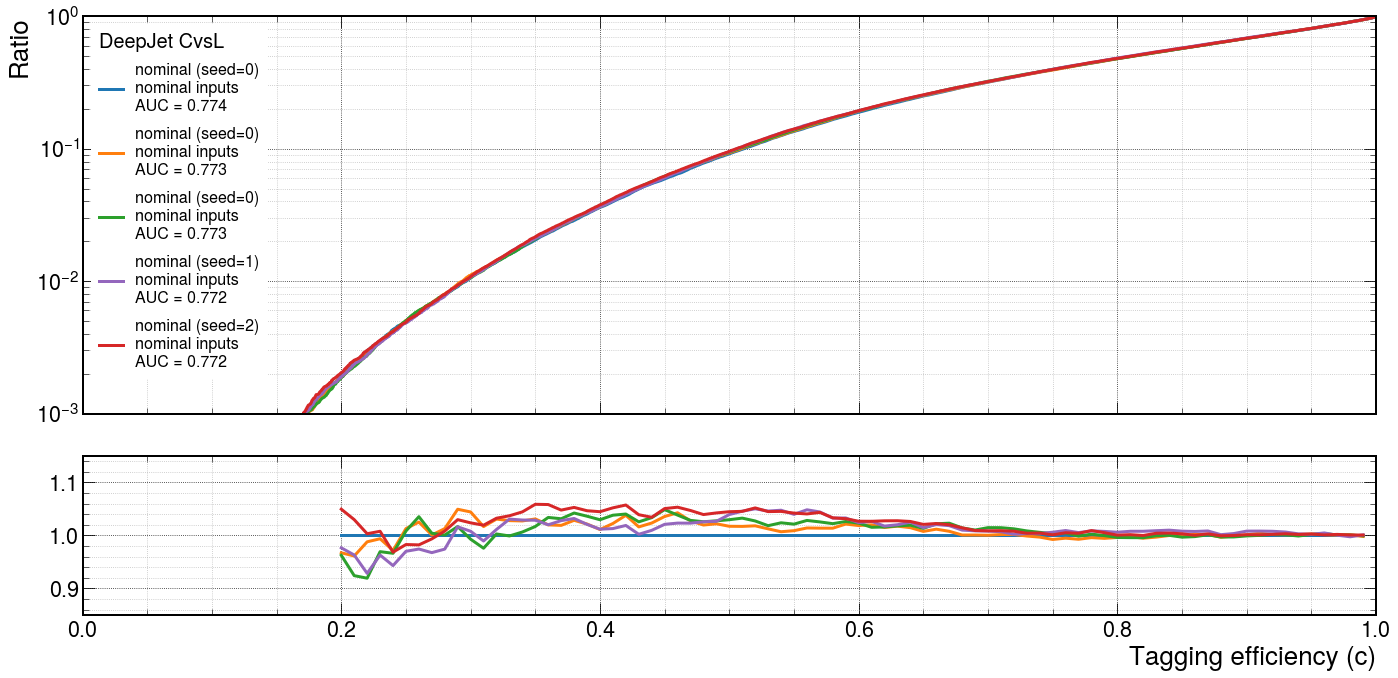

In [10]:
# BvsL ROC curve with subplot
plt.rcParams["figure.autolayout"] = True

fig,ax = plt.subplots(nrows=2, figsize=(20,10), sharex=True, gridspec_kw={'height_ratios': [5, 2]})
plt.style.use(hep.cms.style.ROOT)
ax[0].set_xlim(left=0.,right=1)
ax[0].set_yscale('log')
ax[0].set_ylim(bottom=1e-3,top=1)
ax[1].set_ylim(bottom=0.85,top=1.15)

tag_name = ' (c)'
mistag_name = ' (uds,g)'

ax[0].set_ylabel('Mistagging rate'+mistag_name)
ax[0].set_ylabel('Ratio')
ax[1].set_xlabel('Tagging efficiency'+tag_name)
ax[0].grid(which='minor', alpha=0.85)
ax[0].grid(which='major', alpha=0.95, color='black')
ax[1].grid(which='minor', alpha=0.85)
ax[1].grid(which='major', alpha=0.95, color='black')


legtitle = 'CvsL'
legloc = 'upper left'
title=''
for i,model in enumerate(model_names):
    title = title + model + '_'
    for j,prediction in enumerate(prediction_names):
        xya = np.load(model_dir+model+'/predict_'+prediction+'/CvL.npy', allow_pickle=True)
        legend_text = model_labels[model] + '\n' + prediction_labels[prediction] + '\n' + 'AUC = ' + f'{xya[2,0]:.3f}'
        if model_linestyles:
            ax[0].plot(xya[0], xya[1], linestyle=linestyles[i], color=colors[j], linewidth=3.0, label=legend_text)
        else:
            ax[0].plot(xya[0], xya[1], linestyle=linestyles[j], color=colors[i], linewidth=3.0, label=legend_text)
        if i==0 and j==0:
            reference_xya = xya
        # find out indices
        ticks = np.arange(0.2,1,0.01)
        indices = []
        reference_indices = []
        for tick in ticks:
            indices.append(np.abs(xya[0]-tick).argmin())
            reference_indices.append(np.abs(reference_xya[0]-tick).argmin())
        #print(indices)
        print(np.sum(np.where(np.abs(xya[0][indices]-ticks)>0.001,1,0)))
        if model_linestyles:
            ax[1].plot(ticks, xya[1][indices]/reference_xya[1][reference_indices], linestyle=linestyles[i], color=colors[j], linewidth=3.0, label=legend_text)
        else:
            ax[1].plot(ticks, xya[1][indices]/reference_xya[1][reference_indices], linestyle=linestyles[j], color=colors[i], linewidth=3.0, label=legend_text)
        
# make ROC=0.5 line
#ax.plot(np.arange(1e-3,1,1e-3),np.arange(1e-3,1,1e-3), color='black')
# make legend
if len(model_names)*len(prediction_names)<8:
    leg = ax[0].legend(title='DeepJet '+legtitle,loc=legloc,fontsize=16,title_fontsize=20,labelspacing=0.7,frameon=True,framealpha=1,facecolor='white')
else:
    if not model_linestyles:
        handles, labels = ax[0].get_legend_handles_labels()
        handles_sort = handles[0::2]+handles[1::2]
        labels_sort = labels[0::2]+labels[1::2]
    else:
        handles, labels = ax[0].get_legend_handles_labels()
        handles_sort = handles
        labels_sort = labels
    leg = ax[0].legend(handles_sort, labels_sort, title='DeepJet '+legtitle, fontsize=12, ncols=2, loc=legloc, handleheight=7, labelspacing=0.05, frameon=True,framealpha=1,facecolor='white')
if 'right' in legloc:
    aligned = 'right'
else:
    aligned = 'left'
leg._legend_box.align = aligned
if len(model_names)*len(prediction_names)>8:
    leg._legend_box.align = 'center'
leg.get_frame().set_linewidth(0.0)
#hep.cms.label(llabel='Private Work',rlabel='(13 TeV)')
plt.tight_layout()
fig.subplots_adjust(hspace=0.0)
fig.savefig('{}/roc_curves/ROC_subplot_CvsL.pdf'.format(saveDir), bbox_inches='tight')
fig.savefig('ROC_CvsL.pdf', bbox_inches='tight')

In [28]:
# create a Latex table for the mistag rate at 80% tagging efficiency
model_names = ['nominal','fgsm-0_025','fgsm-0_05','fgsm-0_075','fgsm-0_1','fgsm-0_125','fgsm-0_15','fgsm-0_175','fgsm-0_2','fgsm-0_225','fgsm-0_25']#
prediction_names = ['nominal','fgsm-0_025','fgsm-0_05','fgsm-0_075','fgsm-0_1','fgsm-0_125','fgsm-0_15']

efficiency_value = 0.8

def mistag_at_efficiency(efficiency, mistag_rate, efficiency_value):
    index = np.argmin(abs(efficiency-efficiency_value))
    mistag = mistag_rate[index]
    return mistag
    
BvsL_mistag = np.zeros((len(model_names),len(prediction_names)))
CvsB_mistag = np.zeros((len(model_names),len(prediction_names)))
CvsL_mistag = np.zeros((len(model_names),len(prediction_names)))

for i,model in enumerate(model_names):
    for j,prediction in enumerate(prediction_names):
        xya = np.load(model_dir+model+'/predict_'+prediction+'/BvL.npy', allow_pickle=True)
        efficiency = xya[0]
        mistag_rate = xya [1]
        BvsL_mistag[i,j] = mistag_at_efficiency(efficiency, mistag_rate, efficiency_value)
        xya = np.load(model_dir+model+'/predict_'+prediction+'/CvB.npy', allow_pickle=True)
        efficiency = xya[0]
        mistag_rate = xya [1]
        CvsB_mistag[i,j] = mistag_at_efficiency(efficiency, mistag_rate, efficiency_value)
        xya = np.load(model_dir+model+'/predict_'+prediction+'/CvL.npy', allow_pickle=True)
        efficiency = xya[0]
        mistag_rate = xya [1]
        CvsL_mistag[i,j] = mistag_at_efficiency(efficiency, mistag_rate, efficiency_value)

discriminators = [BvsL_mistag,CvsB_mistag,CvsL_mistag]
discriminator_names = ['BvsL','CvsB','CvsL']
for n,mistag_array in enumerate(discriminators):
    print('\\begin{table}[h]')
    print('\\label{' + 'tab:mistag_{}'.format(discriminator_names[n])+'}')
    print('\\caption{'+'{} mistag rate at {}\% tagging efficiency'.format(discriminator_names[n],efficiency_value*100)+'}')
    columns = '\\begin{tabular}{|c|'
    line = 'model '
    for prediction in prediction_names:
        columns += 'c|'
        line += '& {} '.format(prediction.replace('_','\\_'))
    line += '\\\\'
    columns += '}'
    new_column = '\\hline '+len(prediction_names)*'&'+' \\\\[-1em]'
    print(columns)
    print(new_column)
    print(line)
    for i,model_name in enumerate(model_names):
        print(new_column)
        line = '{} '.format(model_labels[model_name])
        for j in range(len(mistag_array[0,:])):
            if mistag_array[i,j]==np.min(mistag_array[:,j]):
                line += ('& \\textbf{'+'{:.3f}'.format(mistag_array[i,j])+'} ')
            else:
                line += '& {:.3f} '.format(mistag_array[i,j])
        line += '\\\\'
        print(line)
    print('\\hline')
    print('\\end{tabular}')
    print('\\end{table} \n')

\begin{table}[h]
\label{tab:mistag_BvsL}
\caption{BvsL mistag rate at 80.0\% tagging efficiency}
\begin{tabular}{|c|c|c|c|c|c|c|c|}
\hline &&&&&&& \\[-1em]
model & nominal & fgsm-0\_025 & fgsm-0\_05 & fgsm-0\_075 & fgsm-0\_1 & fgsm-0\_125 & fgsm-0\_15 \\
\hline &&&&&&& \\[-1em]
nominal training & \textbf{0.008} & 0.021 & 0.035 & 0.051 & 0.069 & 0.085 & 0.102 \\
\hline &&&&&&& \\[-1em]
fgsm training $\epsilon=0.025$ & 0.009 & 0.013 & 0.017 & 0.021 & 0.026 & 0.031 & 0.036 \\
\hline &&&&&&& \\[-1em]
fgsm training $\epsilon=0.05$ & 0.009 & \textbf{0.012} & \textbf{0.015} & \textbf{0.018} & 0.021 & 0.024 & 0.027 \\
\hline &&&&&&& \\[-1em]
fgsm training $\epsilon=0.075$ & 0.011 & 0.013 & 0.016 & 0.018 & 0.021 & 0.023 & 0.026 \\
\hline &&&&&&& \\[-1em]
fgsm training $\epsilon=0.1$ & 0.011 & 0.013 & 0.016 & 0.018 & 0.020 & 0.022 & 0.024 \\
\hline &&&&&&& \\[-1em]
fgsm training $\epsilon=0.125$ & 0.012 & 0.014 & 0.016 & 0.018 & \textbf{0.020} & 0.022 & 0.023 \\
\hline &&&&&&& \\[-1em]
fgsm trai

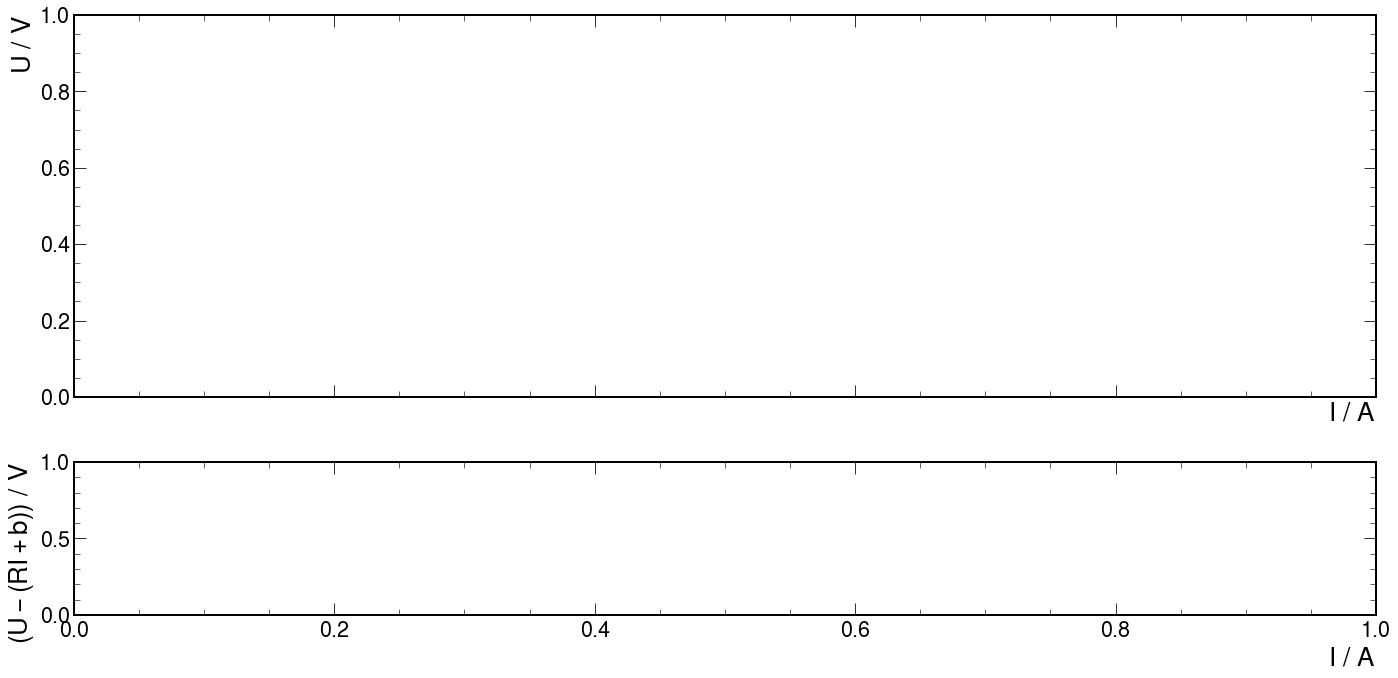

In [19]:
fig, axarray = plt.subplots(2, 1, figsize=(20,10), sharex=True, gridspec_kw={'height_ratios': [5, 2]})

# Grafische Darstellung der Rohdaten
axarray[0].set_xlabel('$I$ / A')
axarray[0].set_ylabel('$U$ / V')

# Zunächst plotten wir eine gestrichelte Nulllinie, dann den eigentlichen Residuenplot:
axarray[1].axhline(y=0., color='black', linestyle='--')
axarray[1].set_xlabel('$I$ / A')
axarray[1].set_ylabel('$(U-(RI+b))$ / V')

plt.tight_layout()
fig.subplots_adjust(hspace=0.0)
plt.show()

